In [ ]:
# Calculo de ecuaciones de pendulo invertido
import control as ct
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import sympy as sp
import control as ct 
import numpy as np
import matplotlib.pyplot as plt

# símbolos
s, M, m, b, l, I, g, F = sp.symbols('s M m b l I g F')
X, Theta = sp.symbols('X Theta')

# ecuaciones en Laplace (linealizadas, small-angle, variables X y Theta)
eq1 = (M + m)*s**2*X + b*s*X + m*l*s**2*Theta - F
eq2 = m*l*s**2*X + (I + m*l**2)*s**2*Theta - m*g*l*Theta

# resolver para X(s) y Theta(s) en función de F(s)
sol = sp.solve([eq1, eq2], [X, Theta], dict=True)[0]
Theta_over_F = sp.simplify(sol[Theta] / F)

# forma factorizada y simplificada simbólica
Theta_over_F_simpl = sp.factor(sp.simplify(Theta_over_F))
print("Transferencia simbólica θ(s)/F(s):")
sp.pprint(Theta_over_F_simpl)

# --- Ejemplo numérico: generar un TransferFunction con valores típicos ---
# valores de ejemplo
vals = {M: 0.5,    # masa del carrito (kg)
    m: 0.2,    # masa del péndulo (kg)
    b: 0.1,    # coef. rozamiento carrito (N s/m)
    l: 0.3,    # distancia al centro de masa (m)
    I: 0.006,  # inercia del péndulo (kg m^2)
    g: 9.81}

Theta_over_F_num = sp.simplify(Theta_over_F_simpl.subs(vals))

# obtener numerador y denominador polinomiales en s
num_sym, den_sym = sp.fraction(sp.simplify(Theta_over_F_num))
num_poly = sp.Poly(sp.expand(num_sym), s)
den_poly = sp.Poly(sp.expand(den_sym), s)
num_coeffs = [float(c) for c in num_poly.all_coeffs()]
den_coeffs = [float(c) for c in den_poly.all_coeffs()]

print("\nCoeficientes numéricos (num):", num_coeffs)
print("Coeficientes numéricos (den):", den_coeffs)

# crear la función de transferencia numérica con la librería control
tf_theta_over_f = ct.tf(num_coeffs, den_coeffs)
print("\nFunción de transferencia numérica θ(s)/F(s):")
print(tf_theta_over_f)

# opcional: mostrar polos y ceros
poles = tf_theta_over_f.poles()
zeros = tf_theta_over_f.zeros()
print("\nPolos:", poles)
print("Ceros:", zeros)

# opcional: respuesta al escalón en la entrada F (pequeña) — descomentar para ejecutar
# t, y = ct.step_response(tf_theta_over_f, T=np.linspace(0, 5, 500))
# plt.plot(t, y); plt.xlabel('t [s]'); plt.ylabel('θ (rad)'); plt.title('Respuesta al escalón θ(t)'); plt.grid()

Transferencia simbólica θ(s)/F(s):
                                     -l⋅m⋅s                                    ↪
────────────────────────────────────────────────────────────────────────────── ↪
     3        2        3                  2    3                2    2         ↪
I⋅M⋅s  + I⋅b⋅s  + I⋅m⋅s  - M⋅g⋅l⋅m⋅s + M⋅l ⋅m⋅s  - b⋅g⋅l⋅m + b⋅l ⋅m⋅s  - g⋅l⋅m ↪

↪    
↪ ───
↪ 2  
↪  ⋅s

Coeficientes numéricos (num): [-0.06, 0.0]
Coeficientes numéricos (den): [0.0132, 0.0024000000000000002, -0.41202000000000005, -0.05886]

Función de transferencia numérica θ(s)/F(s):
<TransferFunction>: sys[1]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

                    -0.06 s
  -------------------------------------------
  0.0132 s^3 + 0.0024 s^2 - 0.412 s - 0.05886

Polos: [ 5.56795561+0.j -5.60694213+0.j -0.14283166+0.j]
Ceros: [0.+0.j]


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


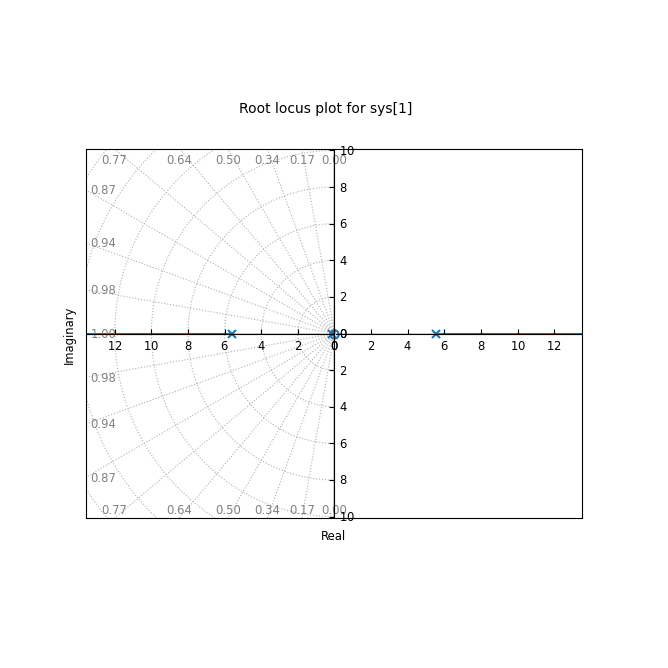

In [4]:
ct.root_locus_map(tf_theta_over_f).plot()
plt.show()